<a href="https://colab.research.google.com/github/jugaloza/Python_Codes/blob/master/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from tqdm import tqdm

x,y = make_classification(n_samples=10000,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,random_state=60)
X_train,X_test,Y_train,Y_test = train_test_split(x,y,stratify=y,random_state=42)



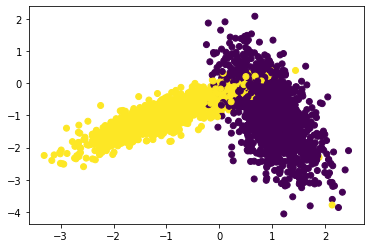

In [0]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:,0], X_test[:,1],c=Y_test)
plt.show()

In [0]:
def RandomSearchCV(X_train,Y_train,classifier,param_range,folds=10):
  # computing random search Cross validation using param_range and number of folds
  #params = {"n_neighbors" : np.random.random_integers(param_range[0],param_range[1],size=10)}
  params = {"n_neighbors" : [3,5,7,9,11,13,15,17,19,21,23]}
  #splitting both X dataset and Y datasets into no of folds
  splitted_dataset_X = np.asarray(np.array_split(X_train,folds))
  splitted_dataset_Y = np.asarray(np.array_split(Y_train,folds))
  
  j = (folds-1)
  test_scores = []
  train_scores = []
  #train_dataset = []
  for k in tqdm(params['n_neighbors']):
    test_scores_folds = []
    train_scores_folds = []
    for i in range(0,folds):
      
      X_train_data = splitted_dataset_X[:(folds-1)]
      # converting 3D data into 2D
      dimensions = X_train_data.shape
      X_train_data = np.reshape(X_train_data,(dimensions[0]*dimensions[1],dimensions[2]))
      
      Y_train_data = splitted_dataset_Y[:(folds-1)]
      # converting labels into 1D
      dimensions = Y_train_data.shape
      Y_train_data = np.reshape(Y_train_data,(dimensions[0]*dimensions[1],))

      X_test_data = splitted_dataset_X[(folds-1)]
      
      Y_test_data = splitted_dataset_Y[(folds-1)]
      classifier.n_neighbors = k
      classifier.fit(X_train_data,Y_train_data)

      Y_predicted = classifier.predict(X_test_data)
      test_scores_folds.append(accuracy_score(Y_test_data,Y_predicted))

      Y_predicted = classifier.predict(X_train_data)
      train_scores_folds.append(accuracy_score(Y_train_data,Y_predicted))
      # swapping last array with current array
      splitted_dataset_X[[i,j]] = splitted_dataset_X[[j,i]]
      splitted_dataset_Y[[i,j]] = splitted_dataset_Y[[j,i]]
    train_scores.append(np.mean(np.array(train_scores_folds)))
    test_scores.append(np.mean(np.array(test_scores_folds)))
  return train_scores,test_scores

  







100%|██████████| 11/11 [00:07<00:00,  1.50it/s]

{'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]}
[0.968, 0.9624666666666667, 0.9608, 0.9608666666666666, 0.9596666666666667, 0.9592, 0.9589333333333334, 0.9575333333333335, 0.9571333333333333, 0.9572666666666666, 0.9571999999999999]
[0.9464, 0.9495999999999999, 0.9518666666666666, 0.9529333333333333, 0.9540000000000001, 0.9544, 0.9540000000000001, 0.9545333333333333, 0.9541333333333334, 0.9541333333333334, 0.9533333333333335]


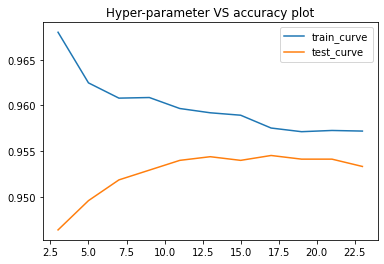

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")
params = {}
neigh = KNeighborsClassifier()
param_range = (1,50)
folds = 3



trainscores,testscores = RandomSearchCV(X_train,Y_train,neigh,param_range,folds)

plt.plot(params['n_neighbors'],trainscores,label = 'train_curve')
plt.plot(params['n_neighbors'],testscores,label = 'test_curve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()


In [0]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

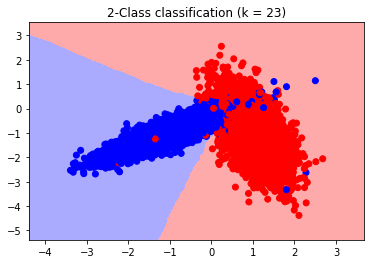

In [0]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 23)
neigh.fit(X_train, Y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], Y_train, neigh)

In [0]:
import numpy as np
t = (1,50)

ar =  np.random.random_integers(t[0],t[1],size=10)
print(ar)

[ 3 24 19 24 25 38  5 49 44  8]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(1, 50 + 1) instead
  after removing the cwd from sys.path.


In [0]:
folds = 4
import numpy as np

a = np.random.random_integers(1,100,size = 20)
b = np.array_split(a,folds)
print(type(b))
c = np.asarray(np.array_split(a,folds))
#print(c)
#i = 0
j = (folds-1)
print(c)
for i in range(folds):
  c_train = c[:(folds-1)]
  c_test = c[(folds-1)]
  print("Train ",c_train)
  print("Test",c_test)
  print(i,j)
  c[[i,j]] = c[[j,i]]
  
  



<class 'list'>
[[51 55 81 31 18]
 [93 67 31 22 17]
 [61 13 71 75 35]
 [59 38 58 59 66]]
Train  [[51 55 81 31 18]
 [93 67 31 22 17]
 [61 13 71 75 35]]
Test [59 38 58 59 66]
0 3
Train  [[59 38 58 59 66]
 [93 67 31 22 17]
 [61 13 71 75 35]]
Test [51 55 81 31 18]
1 3
Train  [[59 38 58 59 66]
 [51 55 81 31 18]
 [61 13 71 75 35]]
Test [93 67 31 22 17]
2 3
Train  [[59 38 58 59 66]
 [51 55 81 31 18]
 [93 67 31 22 17]]
Test [61 13 71 75 35]
3 3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  after removing the cwd from sys.path.


In [0]:
      dimensions = Y_train_data.shape
      print(dimensions)
      Y_train_data_2D = np.reshape(Y_train_data,(dimensions[0]*dimensions[1],dimensions[2]))



      dimensions = X_train_data.shape
      Y_test_data_2D = np.reshape(Y_test_data,(dimensions[0]*dimensions[1],dimensions[2]))

      dimensions = X_test_data.shape
      X_test_data_2D = np.reshape(X_test_data,(dimensions[0]*dimensions[1],dimensions[2]))

In [0]:
print(X_train.shape)
print(Y_train.shape)
folds = 4
a = np.array_split(X_train,folds)
#print(a)
splitted_dataset_X = np.asarray(np.array_split(X_train,folds))
print("After splitting X",splitted_dataset_X)
print(splitted_dataset_X.shape)
#print(np.array_split(Y_train,folds))
splitted_dataset_Y = np.asarray(np.array_split(Y_train,folds))
print("After splitting",splitted_dataset_Y)
print(splitted_dataset_Y.shape)
#splitted_dataset_y = np.array_split(X_train,folds)
#print(type(splitted_dataset_y))

X_train_data = splitted_dataset_X[:(folds-1)]
dimensions = X_train_data.shape
X_train_data_2D = np.reshape(X_train_data,(dimensions[0]*dimensions[1],dimensions[2]))
print("X Train",X_train_data_2D.shape)
Y_train_data = splitted_dataset_Y[:(folds-1)]
a = Y_train_data.shape
Y_train_data = np.reshape(Y_train_data,(a[0]*a[1],))
print(Y_train_data.shape,X_train_data_2D.shape)
Y_test_data = splitted_dataset_Y[(folds-1)]
print(Y_test_data.shape)
X_test_data = splitted_dataset_X[(folds-1)]
print(X_test_data.shape)
#X_train_data.reshape(())
#print(r,c)
#print(d.shape)
#print(X_train_data)
#print(X_train_data.shape)
#print(X_train_data[(folds-1)])
#print(len(X_test))

params = {"n_neighbors" : [random.randrange(param_range[0],param_range[1],2) for p in range(0,10)]}
print(params)

(7500, 2)
(7500,)
After splitting X [[[ 0.45267141 -1.42381257]
  [ 0.61696406 -0.00418956]
  [-1.80708012 -1.34499648]
  ...
  [ 0.88810392 -1.60558887]
  [ 1.5637277  -1.904574  ]
  [-2.35188789 -1.95112688]]

 [[-2.41942816 -1.83833666]
  [ 0.330275   -0.10232315]
  [ 0.78157438 -1.52409351]
  ...
  [ 0.14420645 -1.0184555 ]
  [ 0.92528251 -1.50383848]
  [ 0.88143707 -0.27178179]]

 [[ 1.61712313 -1.55001685]
  [ 1.59716304 -1.80386996]
  [ 0.95039301 -0.39725522]
  ...
  [ 1.36210506 -0.82215737]
  [-0.63739139 -0.5726532 ]
  [-1.19725127 -1.21248886]]

 [[ 1.54887887  0.20886674]
  [-1.80141237 -1.66581968]
  [-0.2365467  -0.43341356]
  ...
  [ 0.63107723 -0.4743162 ]
  [-0.47320722 -0.6387028 ]
  [ 1.07909424 -1.67541279]]]
(4, 1875, 2)
After splitting [[0 0 1 ... 0 0 1]
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 1 1 ... 0 1 0]]
(4, 1875)
X Train (5625, 2)
(5625,) (5625, 2)
(1875,)
(1875, 2)
{'n_neighbors': [3, 5, 49, 31, 35, 31, 35, 15, 23, 11]}


In [0]:
x = np.random.random_integers(1,50,size=10)
print(x)

[30 36 49 34 45 22 35  4 41 18]
